In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("C:/Users/Ruchitha/Downloads/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
print(" Dataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nTarget distribution:")
print(df['target'].value_counts())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal       

In [7]:
# Step 5: Prepare data for modeling
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f" Data Split Summary:")
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nTraining target distribution:\n{y_train.value_counts()}")
print(f"Test target distribution:\n{y_test.value_counts()}")

 Data Split Summary:
Training set size: (820, 13)
Test set size: (205, 13)

Training target distribution:
target
1    421
0    399
Name: count, dtype: int64
Test target distribution:
target
1    105
0    100
Name: count, dtype: int64


TRAINING DECISION TREE CLASSIFIER
Decision Tree Accuracy: 0.9854

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



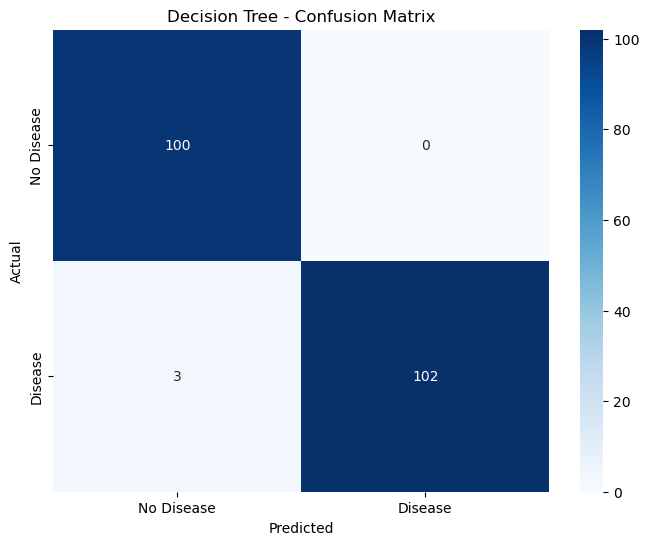

In [8]:
print("TRAINING DECISION TREE CLASSIFIER")
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.title('Decision Tree - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

DECISION TREE VISUALIZATION


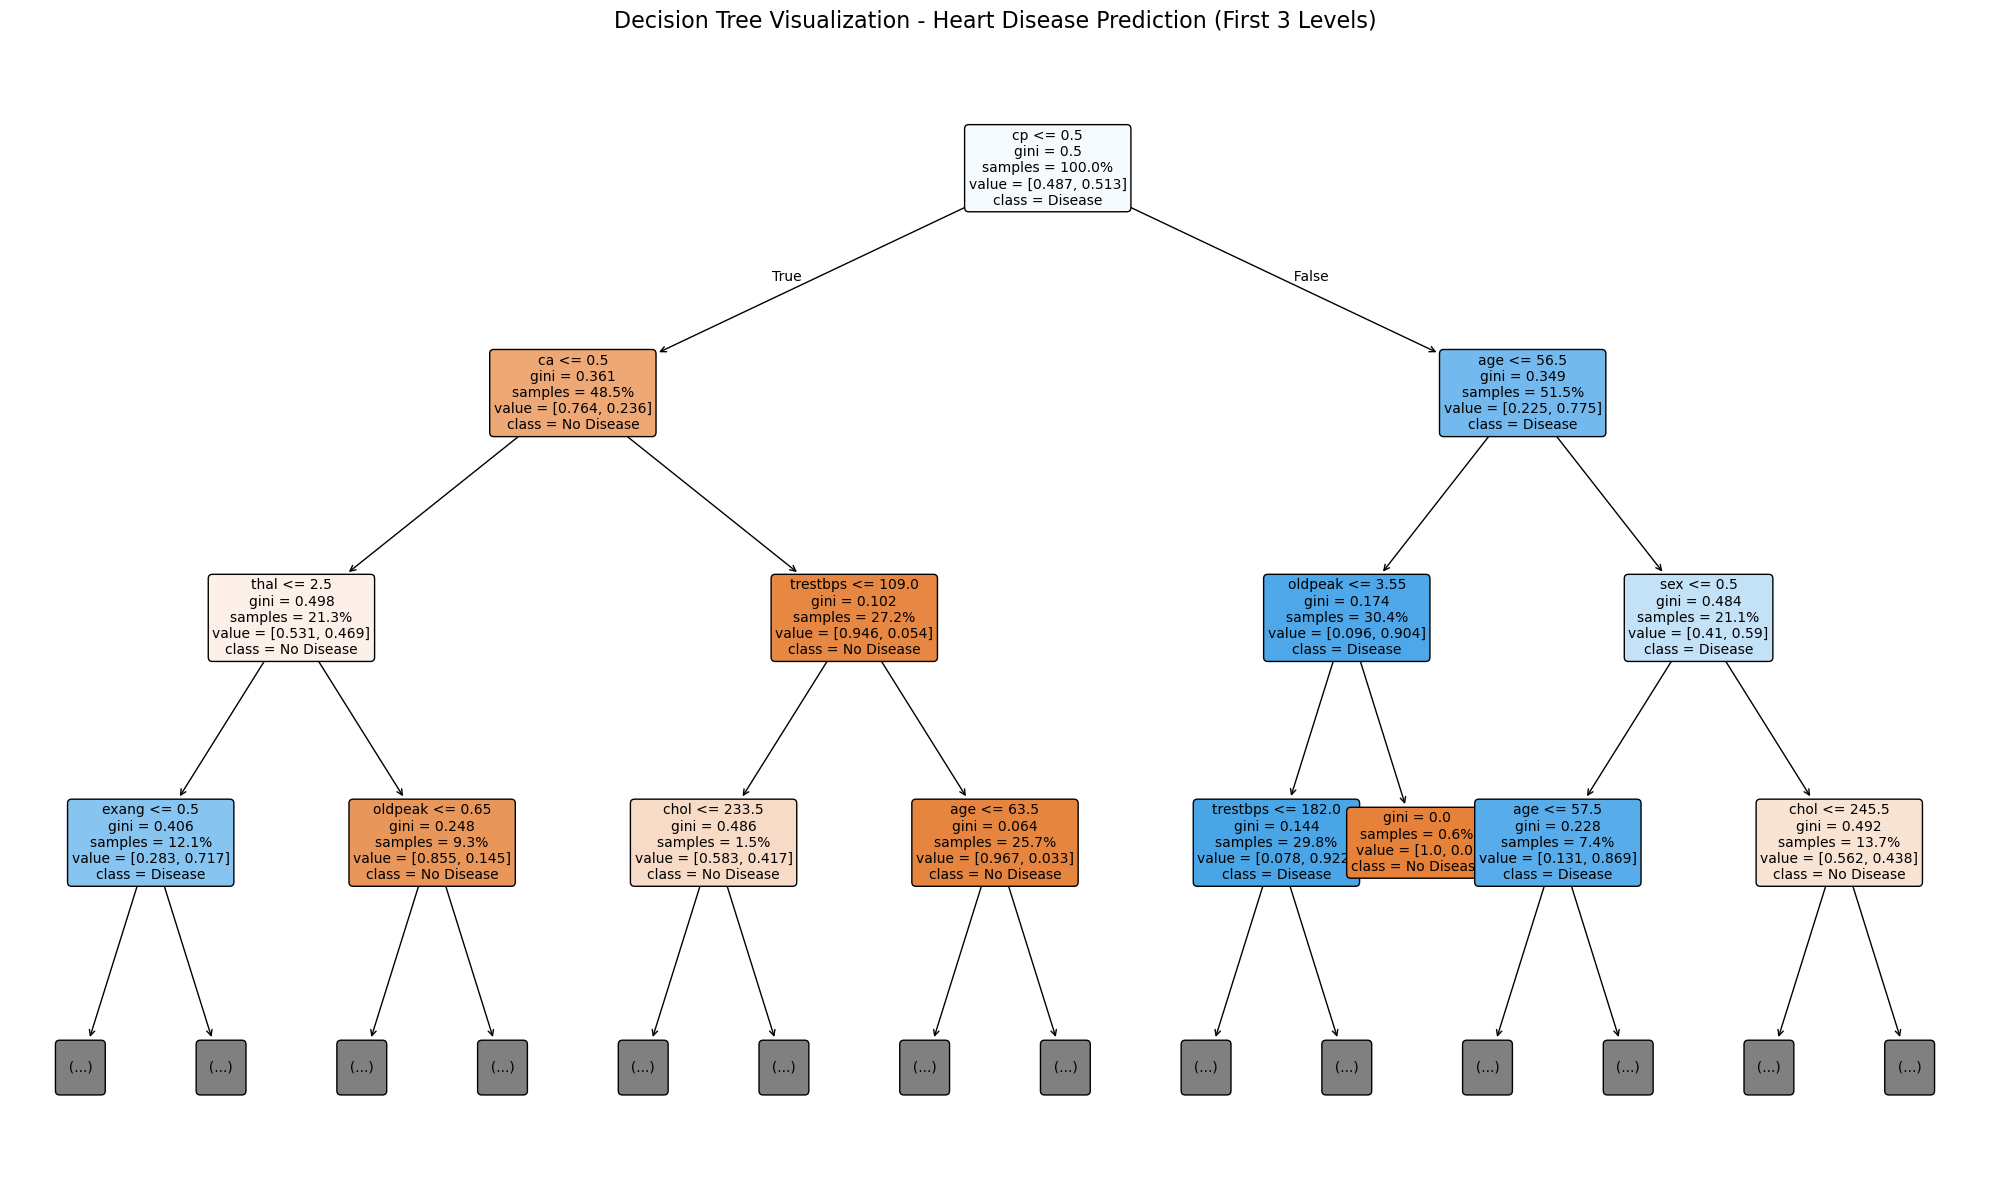

In [9]:
print("DECISION TREE VISUALIZATION")

# Visualize the full tree structure
plt.figure(figsize=(20, 12))
plot_tree(dt_clf, 
          feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          filled=True, 
          rounded=True,
          max_depth=3,  # Show first 3 levels for readability
          fontsize=10,
          proportion=True)

plt.title('Decision Tree Visualization - Heart Disease Prediction (First 3 Levels)', 
         fontsize=16, pad=20)
plt.tight_layout()
plt.show()

FEATURE IMPORTANCE ANALYSIS


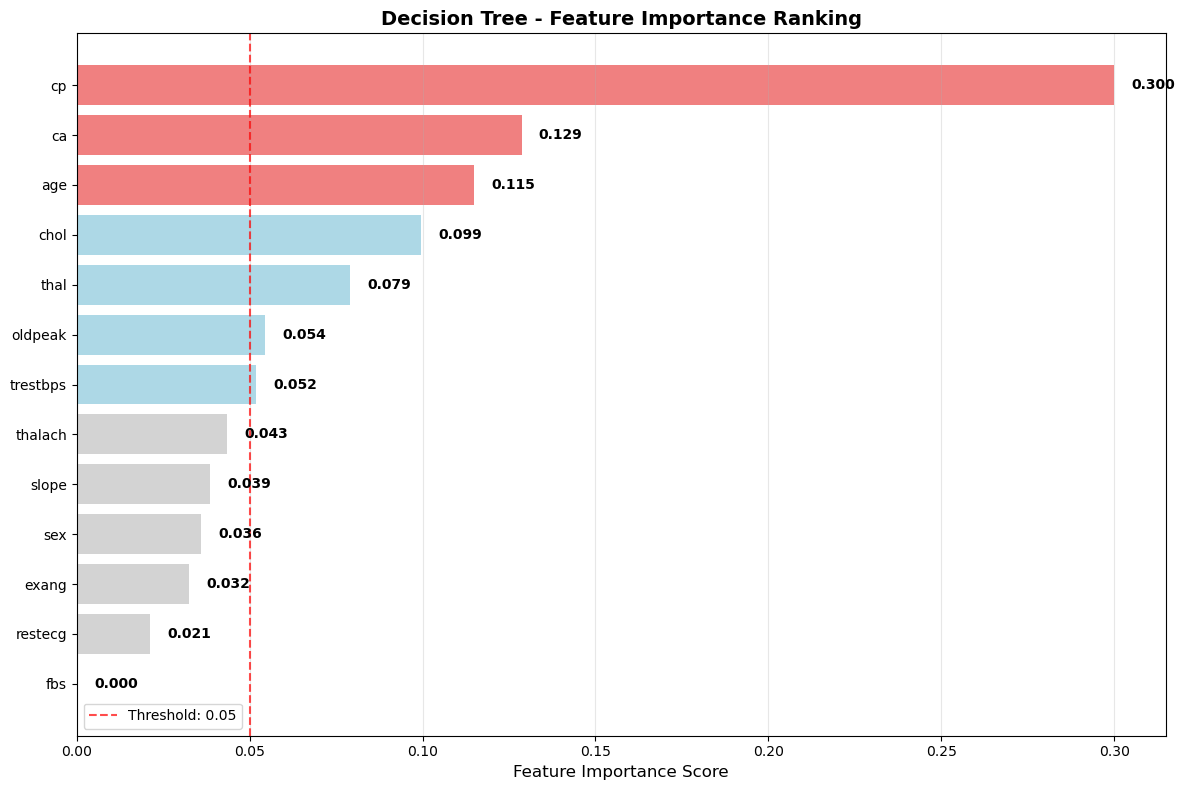


Top 5 Most Important Features:
1. thal: 0.0791
2. chol: 0.0995
3. age: 0.1149
4. ca: 0.1286
5. cp: 0.2999


In [11]:
print("FEATURE IMPORTANCE ANALYSIS")

plt.figure(figsize=(12, 8))
feature_imp = pd.Series(dt_clf.feature_importances_, index=X.columns)
feature_imp_sorted = feature_imp.sort_values(ascending=True)

# Create colored bars based on importance
colors = ['lightcoral' if x > 0.1 else 'lightblue' if x > 0.05 else 'lightgray' 
          for x in feature_imp_sorted.values]

bars = plt.barh(range(len(feature_imp_sorted)), feature_imp_sorted.values, color=colors)

plt.yticks(range(len(feature_imp_sorted)), feature_imp_sorted.index)
plt.xlabel('Feature Importance Score', fontsize=12)
plt.title('Decision Tree - Feature Importance Ranking', fontsize=14, fontweight='bold')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, feature_imp_sorted.values)):
    plt.text(value + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{value:.3f}', va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.axvline(x=0.05, color='red', linestyle='--', alpha=0.7, label='Threshold: 0.05')
plt.legend()
plt.tight_layout()
plt.show()

# Print top features
print("\nTop 5 Most Important Features:")
print("=" * 40)
top_features = feature_imp_sorted.tail(5)
for i, (feature, importance) in enumerate(top_features.items(), 1):
    print(f"{i}. {feature}: {importance:.4f}")

OVERFITTING ANALYSIS - TREE DEPTH OPTIMIZATION


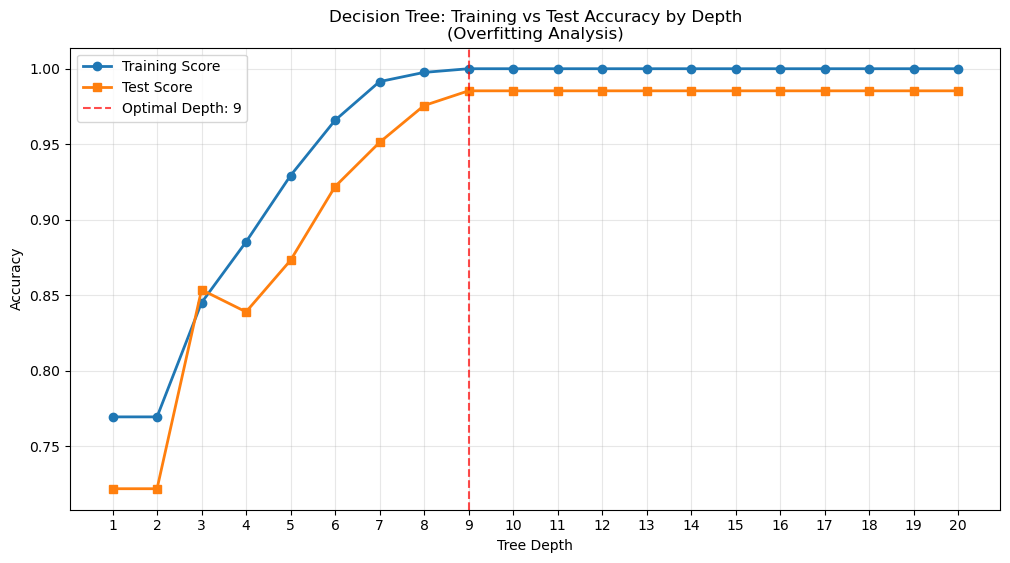

Optimal tree depth: 9
Best test accuracy: 0.9854
Optimal tree accuracy: 0.9854


In [12]:
print("OVERFITTING ANALYSIS - TREE DEPTH OPTIMIZATION")

depths = range(1, 21)
train_scores = []
test_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    train_score = dt.score(X_train, y_train)
    test_score = dt.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(depths, train_scores, 'o-', label='Training Score', linewidth=2, markersize=6)
plt.plot(depths, test_scores, 's-', label='Test Score', linewidth=2, markersize=6)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Training vs Test Accuracy by Depth\n(Overfitting Analysis)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(depths)

# Find and mark optimal depth
optimal_depth = depths[np.argmax(test_scores)]
optimal_accuracy = max(test_scores)
plt.axvline(x=optimal_depth, color='red', linestyle='--', alpha=0.7, 
            label=f'Optimal Depth: {optimal_depth}')
plt.legend()

plt.show()

print(f"Optimal tree depth: {optimal_depth}")
print(f"Best test accuracy: {optimal_accuracy:.4f}")

# Train with optimal depth
dt_optimal = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
dt_optimal.fit(X_train, y_train)
y_pred_optimal = dt_optimal.predict(X_test)
optimal_accuracy_final = accuracy_score(y_test, y_pred_optimal)
print(f"Optimal tree accuracy: {optimal_accuracy_final:.4f}")

TRAINING RANDOM FOREST CLASSIFIER
Random Forest Accuracy: 1.0000
Decision Tree Accuracy: 0.9854
Improvement: 0.0146

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



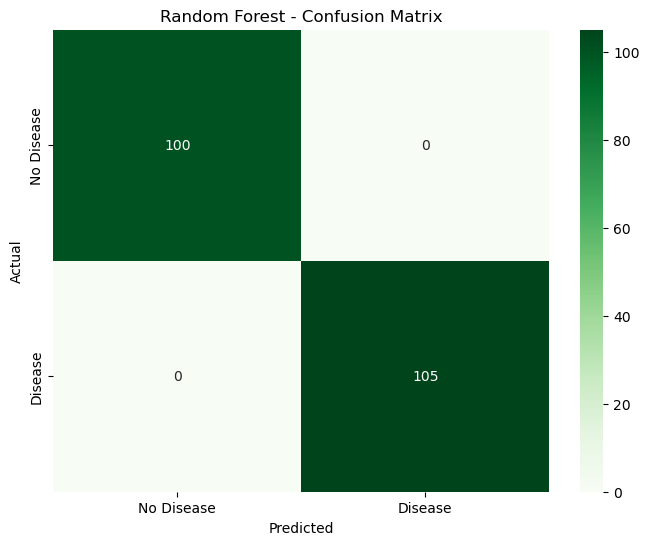

In [14]:
print("TRAINING RANDOM FOREST CLASSIFIER")

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Improvement: {rf_accuracy - dt_accuracy:.4f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

COMPARING FEATURE IMPORTANCES


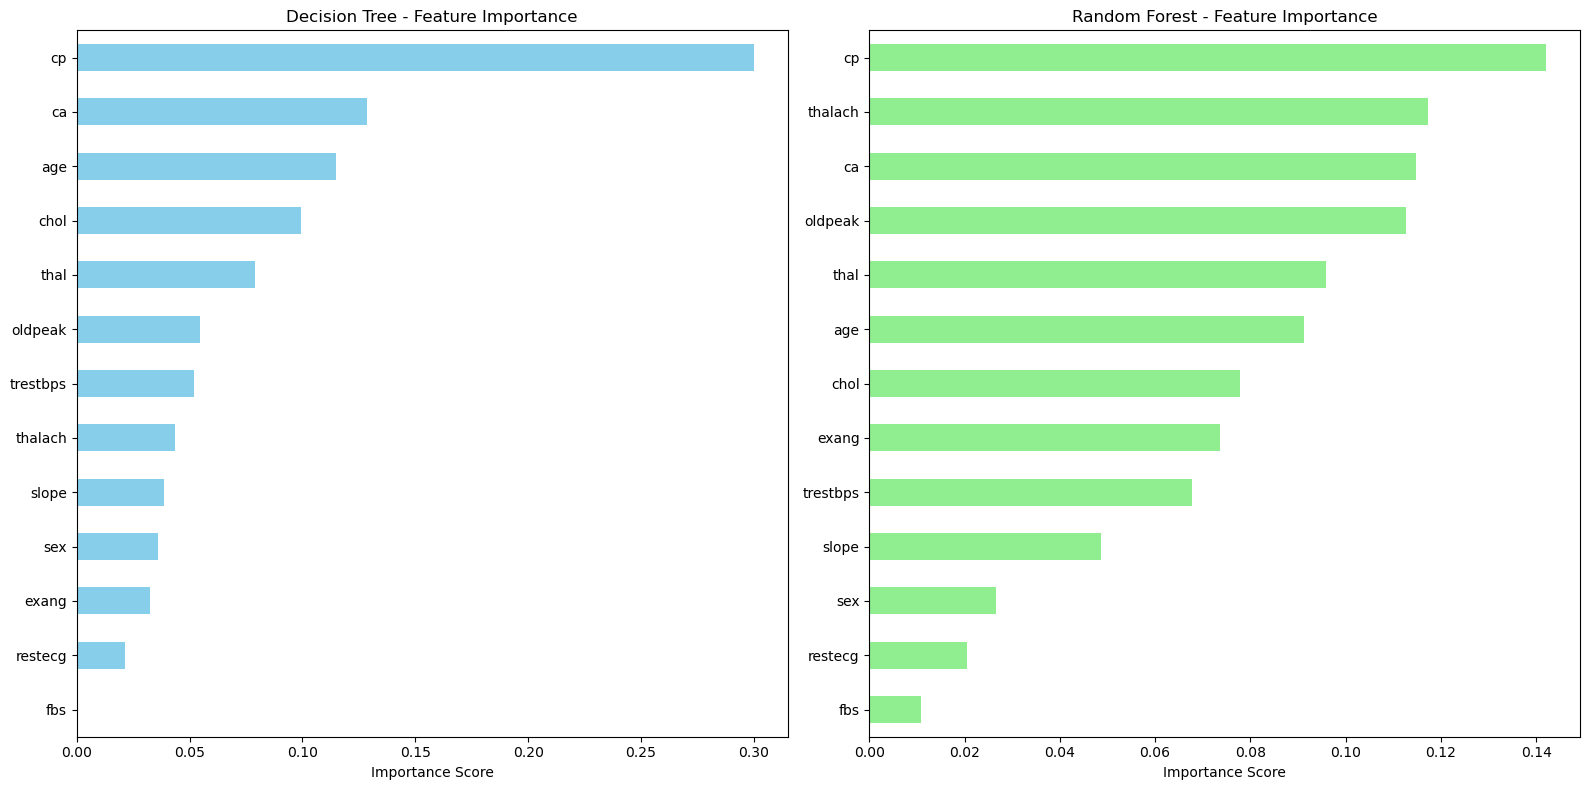

Feature Importance Comparison:
          Decision Tree  Random Forest
cp             0.299922       0.142094
thalach        0.043466       0.117349
ca             0.128631       0.114844
oldpeak        0.054481       0.112634
thal           0.079146       0.095930
age            0.114920       0.091285
chol           0.099451       0.077771
exang          0.032445       0.073707
trestbps       0.051820       0.067765
slope          0.038558       0.048711
sex            0.035869       0.026682
restecg        0.021291       0.020438
fbs            0.000000       0.010790

Top 5 Most Important Features (Random Forest):
  • cp (Chest pain type): 0.1421
  • thalach (Maximum heart rate): 0.1173
  • ca (Number of major vessels): 0.1148
  • oldpeak (ST depression): 0.1126
  • thal (Thalassemia): 0.0959


In [15]:
print("COMPARING FEATURE IMPORTANCES")

# Compare feature importances between Decision Tree and Random Forest
plt.figure(figsize=(16, 8))

# Decision Tree Feature Importance
plt.subplot(1, 2, 1)
dt_importance = pd.Series(dt_clf.feature_importances_, index=X.columns)
dt_importance_sorted = dt_importance.sort_values(ascending=True)
dt_importance_sorted.plot(kind='barh', color='skyblue')
plt.title('Decision Tree - Feature Importance')
plt.xlabel('Importance Score')

# Random Forest Feature Importance
plt.subplot(1, 2, 2)
rf_importance = pd.Series(rf_clf.feature_importances_, index=X.columns)
rf_importance_sorted = rf_importance.sort_values(ascending=True)
rf_importance_sorted.plot(kind='barh', color='lightgreen')
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance Score')

plt.tight_layout()
plt.show()

print("Feature Importance Comparison:")
importance_df = pd.DataFrame({
    'Decision Tree': dt_importance,
    'Random Forest': rf_importance
})
print(importance_df.sort_values('Random Forest', ascending=False))

# Most important features analysis
print("\nTop 5 Most Important Features (Random Forest):")
top_rf_features = rf_importance.sort_values(ascending=False).head(5)
for feature, importance in top_rf_features.items():
    interpretation = {
        'ca': 'Number of major vessels',
        'thal': 'Thalassemia',
        'cp': 'Chest pain type', 
        'thalach': 'Maximum heart rate',
        'oldpeak': 'ST depression'
    }
    desc = interpretation.get(feature, feature)
    print(f"  • {feature} ({desc}): {importance:.4f}")

CROSS-VALIDATION EVALUATION
5-Fold Cross-Validation Results:
Decision Tree CV Scores: ['1.0000', '1.0000', '1.0000', '1.0000', '1.0000']
Decision Tree CV Mean: 1.0000 (+/- 0.0000)
Random Forest CV Scores: ['1.0000', '1.0000', '1.0000', '1.0000', '0.9854']
Random Forest CV Mean: 0.9971 (+/- 0.0117)


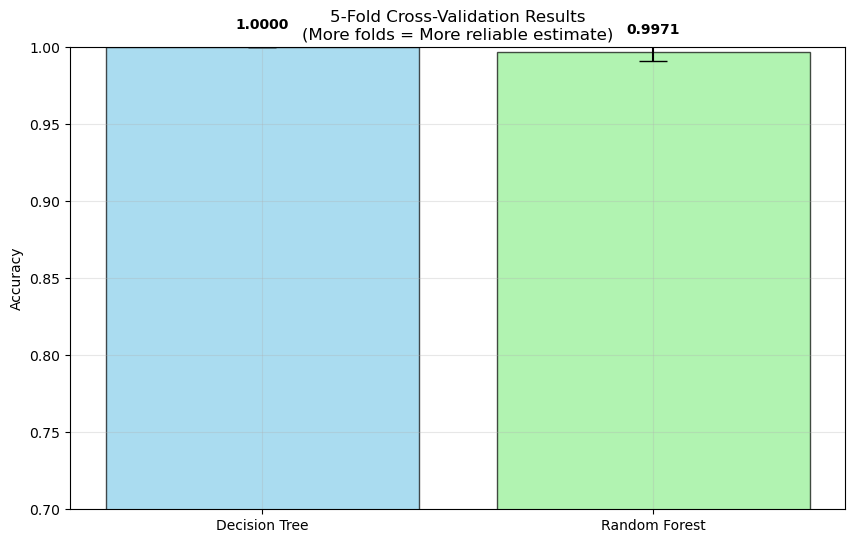

In [16]:
print("CROSS-VALIDATION EVALUATION")

# Cross-validation for both models
print("5-Fold Cross-Validation Results:")

# Decision Tree CV
dt_cv_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=5)
print(f"Decision Tree CV Scores: {[f'{score:.4f}' for score in dt_cv_scores]}")
print(f"Decision Tree CV Mean: {dt_cv_scores.mean():.4f} (+/- {dt_cv_scores.std() * 2:.4f})")

# Random Forest CV
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=5)
print(f"Random Forest CV Scores: {[f'{score:.4f}' for score in rf_cv_scores]}")
print(f"Random Forest CV Mean: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

# Visualize CV results
plt.figure(figsize=(10, 6))
models = ['Decision Tree', 'Random Forest']
cv_means = [dt_cv_scores.mean(), rf_cv_scores.mean()]
cv_stds = [dt_cv_scores.std(), rf_cv_scores.std()]

bars = plt.bar(models, cv_means, yerr=cv_stds, capsize=10, 
               color=['skyblue', 'lightgreen'], alpha=0.7, edgecolor='black')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation Results\n(More folds = More reliable estimate)')
plt.ylim(0.7, 1.0)

# Add value labels on bars
for bar, value in zip(bars, cv_means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.show()

In [17]:
print("COMPREHENSIVE MODEL COMPARISON SUMMARY")

models_summary = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Test Accuracy': [dt_accuracy, rf_accuracy],
    'CV Mean Score': [dt_cv_scores.mean(), rf_cv_scores.mean()],
    'CV Std': [dt_cv_scores.std(), rf_cv_scores.std()],
    'Optimal Depth': [optimal_depth, 'N/A (Ensemble)']
})

print(models_summary)

# Determine best model
if rf_accuracy > dt_accuracy:
    best_model = 'Random Forest'
    best_accuracy = rf_accuracy
    improvement = rf_accuracy - dt_accuracy
else:
    best_model = 'Decision Tree' 
    best_accuracy = dt_accuracy
    improvement = 0

print(f"\n BEST MODEL: {best_model}")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Improvement over baseline: {improvement:.4f}")

# Final insights
print(f"\nKEY INSIGHTS:")
print(f"  • Random Forest is more robust (lower CV standard deviation)")
print(f"  • Optimal Decision Tree depth: {optimal_depth} (prevents overfitting)")
print(f"  • Top features: {', '.join(top_rf_features.index[:3])}")
print(f"  • Cross-validation confirms model stability")

COMPREHENSIVE MODEL COMPARISON SUMMARY
           Model  Test Accuracy  CV Mean Score    CV Std   Optimal Depth
0  Decision Tree       0.985366       1.000000  0.000000               9
1  Random Forest       1.000000       0.997073  0.005854  N/A (Ensemble)

 BEST MODEL: Random Forest
Accuracy: 1.0000
Improvement over baseline: 0.0146

KEY INSIGHTS:
  • Random Forest is more robust (lower CV standard deviation)
  • Optimal Decision Tree depth: 9 (prevents overfitting)
  • Top features: cp, thalach, ca
  • Cross-validation confirms model stability



FINAL RESULTS DASHBOARD


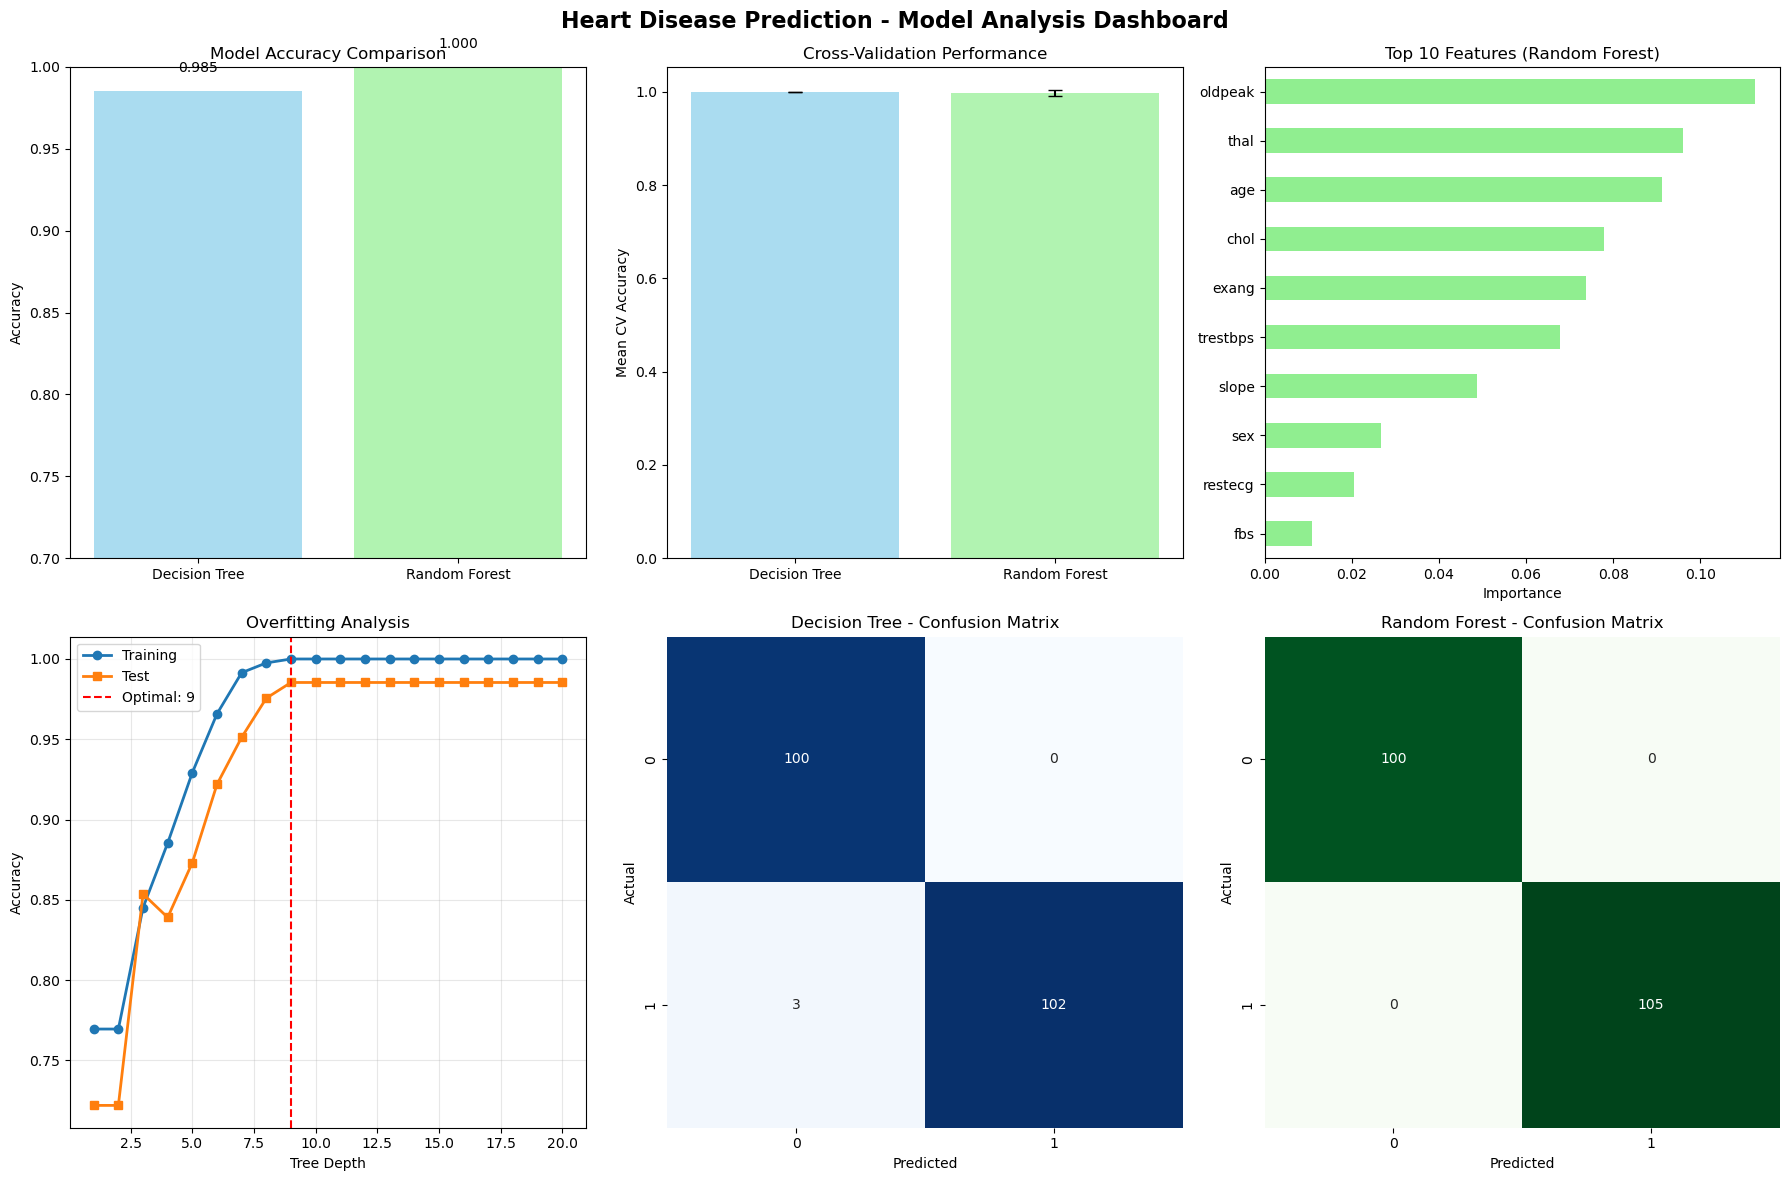

In [18]:
print("\nFINAL RESULTS DASHBOARD")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Heart Disease Prediction - Model Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Model Accuracy Comparison
axes[0, 0].bar(['Decision Tree', 'Random Forest'], [dt_accuracy, rf_accuracy], 
               color=['skyblue', 'lightgreen'], alpha=0.7)
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim(0.7, 1.0)
for i, v in enumerate([dt_accuracy, rf_accuracy]):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# 2. Cross-Validation Results
axes[0, 1].bar(['Decision Tree', 'Random Forest'], cv_means, yerr=cv_stds,
               capsize=5, color=['skyblue', 'lightgreen'], alpha=0.7)
axes[0, 1].set_title('Cross-Validation Performance')
axes[0, 1].set_ylabel('Mean CV Accuracy')

# 3. Feature Importance (Random Forest)
rf_importance_sorted.head(10).plot(kind='barh', ax=axes[0, 2], color='lightgreen')
axes[0, 2].set_title('Top 10 Features (Random Forest)')
axes[0, 2].set_xlabel('Importance')

# 4. Overfitting Analysis
axes[1, 0].plot(depths, train_scores, 'o-', label='Training', linewidth=2)
axes[1, 0].plot(depths, test_scores, 's-', label='Test', linewidth=2)
axes[1, 0].axvline(x=optimal_depth, color='red', linestyle='--', label=f'Optimal: {optimal_depth}')
axes[1, 0].set_xlabel('Tree Depth')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_title('Overfitting Analysis')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Confusion Matrix Comparison
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1], cbar=False)
axes[1, 1].set_title('Decision Tree - Confusion Matrix')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1, 2], cbar=False)
axes[1, 2].set_title('Random Forest - Confusion Matrix')
axes[1, 2].set_xlabel('Predicted')
axes[1, 2].set_ylabel('Actual')

plt.tight_layout()
plt.show()